In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.video_visualizer import VideoVisualizer
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2 import model_zoo

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [6]:
cfg = get_cfg()

In [23]:
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x.yaml"))

In [25]:
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x.yaml")
predictor = DefaultPredictor(cfg)

model_final_04e291.pkl: 237MB [00:31, 7.44MB/s]                               


In [26]:
im = cv2.imread("../images/152-1521581_actor-actress-images-arun-full-salman-khan-ka.png")

In [41]:
outputs = predictor(im)

In [42]:
outputs

{'instances': Instances(num_instances=1, image_height=1016, image_width=860, fields=[pred_boxes: Boxes(tensor([[207.0965,  27.6718, 657.5065, 992.4337]], device='cuda:0')), scores: tensor([0.9997], device='cuda:0'), pred_classes: tensor([0], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]]], device='cuda:0'), pred_keypoints: tensor([[[3.7533e+02, 1.8184e+02, 2.4668e+00],
          [3.9360e+02, 1.4854e+02, 5.4184e+00],
          [3.4523e+02, 1.5820e+02, 9.6677e-01],
          [4.3983e+02, 1.4316e+02, 9.9674e-01],
          [3.2588e+02, 1.6680e+02, 7.3848e-01],
          [5.6345e+02, 2.7101e+02, 2.3062e-01],
          [2.7858e+02, 3.1613e+

In [66]:
pred_keypoints = outputs["instances"].get_fields()["pred_keypoints"][0]
point_len = pred_keypoints.shape[0]
pred_keypoints[0][0]

tensor(375.3284, device='cuda:0')

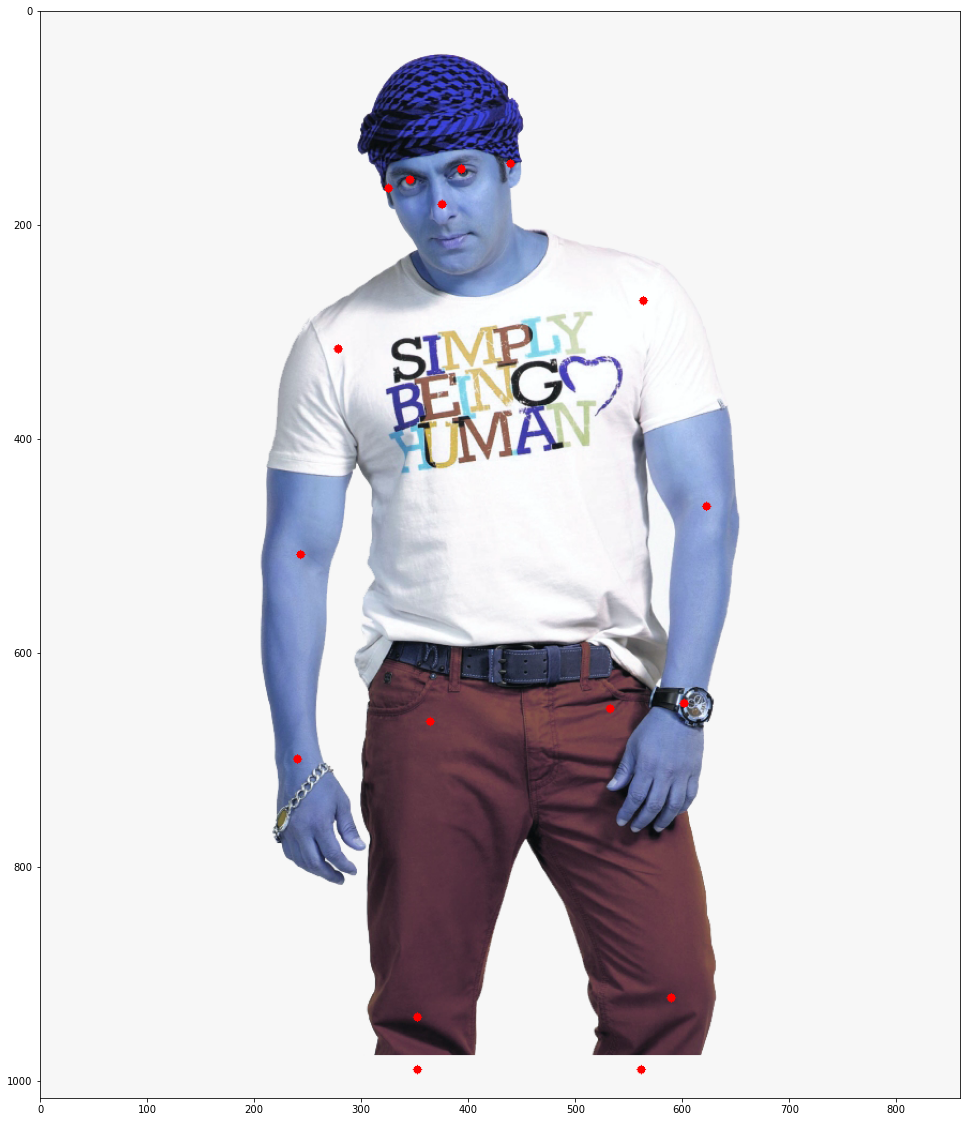

In [74]:
plt.rcParams["figure.figsize"] = (20,20)
for i in range(point_len):
    im = cv2.circle(im, (int(pred_keypoints[i][0]),int(pred_keypoints[i][1])), radius=0, color=(255, 0, 0), thickness=8)
    
plt.imshow(im)

In [56]:
Visualizer.draw_and_connect_keypoints(outputs["instances"].get_fields()["pred_keypoints"][0])

TypeError: draw_and_connect_keypoints() missing 1 required positional argument: 'keypoints'